#Amadeus datasets
bookings.csv
searches.csv

##First exercise: count the number of lines in Python for each file



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from GeoBases import GeoBase

In [1]:
f = open('C:/Users/Michael/Desktop/Amadeus_dataset/bookings.csv')

print "First exercice: Count the number of lines in Python for each files."

print "\n[bookings.csv]: ", len(f.readlines()), " lines."

f.close()
f = open('C:/Users/Michael/Desktop/Amadeus_dataset/searches.csv')

print "\n[searches.csv]: ", len(f.readlines()), " lines."
f.close()

First exercice: Count the number of lines in Python for each files.

[bookings.csv]:  10000011  lines.

[searches.csv]:  20390199  lines.


##Second exercise: top 10 arrival airports in the world in 2013 (using the bookings file)

>Arrival airport is the column arr_port. It is the IATA code for the airport
To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
Print the top 10 arrival airports in the standard output, including the number of passengers.




###1.Exploring the csv file


In [2]:
f = open('C:/Users/Michael/Desktop/Amadeus_dataset/bookings.csv')
h = f.readline()
print h
f.close()

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      



The separator of the csv file is '^'

In [4]:
header = str.split(h, '^')
print header, "\n number of columns: " , len(header)

['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ', 'rloc          ', 'cre_date           ', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class', 'brd_time           ', 'off_time           ', 'pax', 'year', 'month', 'oid      \n'] 
 number of columns:  38


###2.import the csv file into a DataFrame

In [5]:
data = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/bookings.csv', delimiter='^', header=0)

print "Number of rows in data: %i" % data.shape[0]
print "\nNumber of columns in data: %i" % data.shape[1]

data.head()

data.pax.describe()

Number of rows in data: 10000010

Number of columns in data: 38


C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


count    10000009.000000
mean            0.490880
std             2.199173
min           -90.000000
25%            -1.000000
50%             1.000000
75%             1.000000
max            99.000000
Name: pax, dtype: float64

count of pax is 10000009 instead of 10000010; one value is missing !

In [6]:
data[data.pax.isnull()]

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
5000007,2013-03-25 00:00:00,1V JP,NaN,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,...,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL,NaN,NaN,NaN,NaN


the row 5000007 seems problematic

###3.Fixing the malformed row

In [7]:
data[5000006:5000008]

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
5000006,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
5000007,2013-03-25 00:00:00,1V JP,NaN,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,...,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL,NaN,NaN,NaN,NaN


The source contains both the source and the pos_ctry data.And rloc, pos_iod, bkg_class and cab_class seems to be missing.
I have collected the malformed row using:
`head -n 5000009 bookings.csv | tail`
Then edited the missing separator in gedit. The resulting row and header is saved in `malformedRow.csv`

In [8]:
malformedRow = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/malformedRow.csv', delimiter='^', header=0)
data.drop(data.index[[5000007]], inplace=True)
data = data.append(malformedRow, ignore_index=True)


Then the pax column seems complete

In [9]:
data.pax.describe()

count    10000010.000000
mean            0.490881
std             2.199173
min           -90.000000
25%            -1.000000
50%             1.000000
75%             1.000000
max            99.000000
Name: pax, dtype: float64

###4.Computing the number of passengers per arrival airport

In [12]:
sum_pax_by_arr_port= data.groupby('arr_port').pax.sum()

sum_pax_by_arr_port_ordered = sum_pax_by_arr_port.order(ascending=False)
top10=sum_pax_by_arr_port_ordered.head(n=10)
print(top10)

arr_port
LHR         88809
MCO         70930
LAX         70530
LAS         69630
JFK         66270
CDG         64490
BKK         59460
MIA         58150
SFO         58000
DXB         55590
Name: pax, dtype: float64


###Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

First, I convert the top10 list into a dataframe to store the names of the airports

In [13]:
df = pd.DataFrame(top10)
df['arr_port']=df.index
print df

            pax  arr_port
arr_port                 
LHR       88809  LHR     
MCO       70930  MCO     
LAX       70530  LAX     
LAS       69630  LAS     
JFK       66270  JFK     
CDG       64490  CDG     
BKK       59460  BKK     
MIA       58150  MIA     
SFO       58000  SFO     
DXB       55590  DXB     


Then get the names from GeoBases:

In [14]:
geo_o = GeoBase(data='airports')

airport_names = [geo_o.get(row.strip(), 'name') for row in df.arr_port]
df['airport_names']=airport_names

print "Top 10 arrival airports :\n", df


Import successful from C:\Users\Michael\AppData\Roaming\Python\Python27\site-packages\geobases-5.0.16-py2.7.egg\GeoBases\DataSources\Airports/GeoNames/airports_geonames_only_clean.csv
Available fields for things: ['__key__', '__dup__', '__par__', '__lno__', 'iata_code', 'name', 'city_code', 'country_code', 'country_name', 'lat', 'lng', '__gar__']
(Join) loaded external base "countries" [with ('code',)] for join on ('country_code',)
Built index for fields ('code',)
(Join) loaded external base "ori_por" [with ('iata_code',)] for join on ('city_code',)
/!\ Index on ('iata_code',) already built, exiting...
Top 10 arrival airports :
            pax  arr_port                         airport_names
arr_port                                                       
LHR       88809  LHR                    London Heathrow Airport
MCO       70930  MCO              Orlando International Airport
LAX       70530  LAX          Los Angeles International Airport
LAS       69630  LAS             McCarran In

##Third exercise: plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

>For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

###1.Get the IATA code from the name of the airports

In [16]:
geo_o.fuzzyFind('Malaga','name')[0]

(0.9, 'AGP')

In [17]:
geo_o.fuzzyFind('Madrid','name')[0]

(0.9, 'MAD')

In [18]:
geo_o.fuzzyFind('Barcelona','name')[0]

(0.9, 'BCN')

In [23]:
Malaga='AGP'
Madrid='MAD'
Barcelona='BCN'

###2.Create a month column in the searches dataframe

In [19]:
searches = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/searches.csv', delimiter='^', header=0)
searches.head()

C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


We can extract the month of the search from the Date column:

In [20]:
date_str=[str(row) for row in searches.Date]
months = [int(dt_str.split('-')[1]) for dt_str in date_str]
searches['Month']=months

In [21]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Month
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,1
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,1
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,1
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,1
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,1


###3.Destination searches grouped by month

In [24]:
tbl_Malaga=searches[searches['Destination']==Malaga].groupby('Month').count().iloc[:,0]
tbl_Madrid=searches[searches['Destination']==Madrid].groupby('Month').count().iloc[:,0]
tbl_Barcelona=searches[searches['Destination']==Barcelona].groupby('Month').count().iloc[:,0]


In [26]:
tbl_Malaga

Month
1         9633
2         8379
3        10659
4         8265
5        10830
6         7923
7         8892
8         7866
9         8151
10        6499
11        6384
12        3696
Name: Date, dtype: int64

###4.plotting the searches of the three destinations

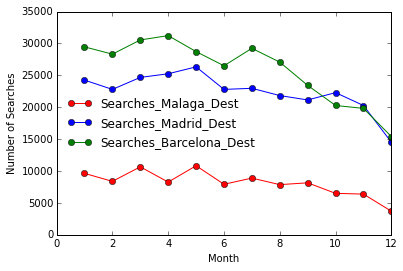

In [31]:
plt.plot(tbl_Malaga.index, tbl_Malaga.values, 'o-', color='r', label='Searches_Malaga_Dest')
plt.plot(tbl_Madrid.index, tbl_Madrid.values, 'o-', color='b', label='Searches_Madrid_Dest')
plt.plot(tbl_Barcelona.index, tbl_Barcelona.values, 'o-', color='g', label='Searches_Barcelona_Dest')
plt.xlabel("Month")
plt.ylabel("Number of Searches")
plt.legend(frameon=False, loc='best')
plt.show()

###5. Re-examining the plotting of the searches

_ During the fourth exercice (see below), I found one malformed row and a lot of duplicates. Thus I have to re-consider the third exercice with this new cleaned dataset. _


C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (41,42,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


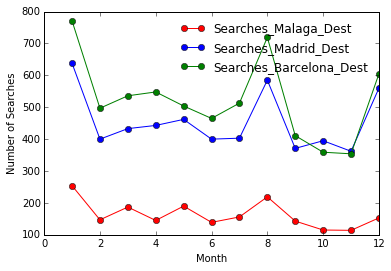

In [23]:
searches = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/Searches_converted_into_Booking.csv')

Malaga='AGP'
Madrid='MAD'
Barcelona='BCN'


date_str=[str(row) for row in searches.Date]
months = [int(dt_str.split('-')[1]) for dt_str in date_str]
searches['Month']=months
tbl_Malaga=searches[searches['Destination']==Malaga].groupby('Month').count().iloc[:,0]
tbl_Madrid=searches[searches['Destination']==Madrid].groupby('Month').count().iloc[:,0]
tbl_Barcelona=searches[searches['Destination']==Barcelona].groupby('Month').count().iloc[:,0]


plt.plot(tbl_Malaga.index, tbl_Malaga.values, 'o-', color='r', label='Searches_Malaga_Dest')
plt.plot(tbl_Madrid.index, tbl_Madrid.values, 'o-', color='b', label='Searches_Madrid_Dest')
plt.plot(tbl_Barcelona.index, tbl_Barcelona.values, 'o-', color='g', label='Searches_Barcelona_Dest')
plt.xlabel("Month")
plt.ylabel("Number of Searches")
plt.legend(frameon=False, loc='best')


###Conclusion

Now the picture is quite different. An increase in the searches is observed in january and august. This is observed on two popular destinations (Madrid and Barcelona), but not on a least popular destination (Malaga). This analysis tells us that most of the searches for summer holidays' destination happen in january and the searches for winter holidays destinations happen in august. We could use this information to suggest promotional operations in january and august.

##Fourth exercise: match searches with bookings

>For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

To find the searches that convert into booking, we have to assume that the booking occurs the same day as the search.

Two dates are present in the bookings dataset: act_date and cre_date. I first assumed that act_date is "action_date" (placing the order) and cre_date is the "creation_date" (vallidating the order by paying).

But then, I got the following feedback from Eoin:
>"When a booking is made originally, it will have the same date in the created and action date fields. However, bookings are frequently modified, say to change for example the number of passengers or the destination or the boarding time or to cancel the booking. When a modification is made, a new row is added with the original creation date, and an action date set to the present day."

Thus, act_date can change but not cre_date. This cre_date is the one that I want to use to track the first day of booking.

I first tried a very naive approach:

###1. (not) Looping on the Searches dataFrame

```python
searches['booking']=[len(dataFixed[(dataFixed.dep_port == row.Origin[0]) & \
(dataFixed.arr_port == row.Destination[0]) & \
(dataFixed.Date == row.Date[0])]) for index,row in searches.iterrows()]
```
During testing, it took about 1 hour to iterate through 2000 rows. This is too long.

Then I looked into true parallel algorithms such as MapReduce. Interestingly pandas has a split-apply-combine strategy that is similar to MapReduce. A great explanation is found [here](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/).

###2. (not) split-apply-combine

The split of the dataFrame is done with the `.groupby()` method.

In [ ]:
grouped_searches = searches.groupby(['Date'])

We can access to the keys of the dict returned by `.groups`

In [ ]:
sorted(grouped_searches.groups.keys())

#['2013-01-01',
# '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV',
# '2013-01-02',
# '2013-01-03',
# '2013-01-04',
# '2013-01-05', ...

One date is malformated here (second row).

In [ ]:
rows = searches[searches.Date == '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV']
#Int64Index([1436001, 1795011, 1795021, 3231031, 3590041, 3590051, 5026061, 5385071, 5385081, 6821091, 7180101, 7180111, 8616121, 8975131, 8975141, 10411151, 10770161, 10770171, 12206181, 12565191, 12565201, 14001211, 14360221, 14360231, 15796241, 16155251, 16155261, 17591271, 17950281, 17950291, 19386301, 19745311, 19745321], dtype='int64')

searches.iloc[rows].to_csv('C:/Users/Michael/Desktop/Amadeus_dataset/malformed_Searches_rows.csv')

Actually, this is 33 rows that are mal formed. I openned the `malformed_Searches_rows.csv` into notepad++ and found a " before the date and after KIV.

In [ ]:
searches[(searches.Date =='2013-01-01') & (searches.Origin == 'ATH') & (searches.Destination == 'MIL')]

Then I found 57 occurence of the same row, thus it is safe to remove the malformed row.

In [ ]:
searches.drop(rows, inplace=True)

In addition it will be better to reduce the number of duplicated rows in the searches dataFrame.

In [ ]:
searches.drop_duplicates(inplace=True)
searches.shape[0]
# 422189

Then I realised that after doing a `.groupby()`on both dataFrames I have no ways to match the groups-by-date in the `.apply()` function. Thus I did not pursue this further.

The most important step is to match the two dataframes rows on `Date`, `Origin` and `Destination`. This is known as a `JOIN` in SQL. Interestingly, pandas has a similar fonctionnality with the `.merge()` function.

###3. Left JOIN on the Searches with the bookings DataFrame

Since the two DataFrames are heavy in memory, I re-imported only the necessary columns of the Bookings file.

In [3]:
dataFixed = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/bookings_fixed.csv', usecols=['cre_date           ', 'dep_port','arr_port'])
searches = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/searches.csv', delimiter='^', header=0)


C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


__/!\__ About 13Go of RAM required

In [4]:
rows = searches[searches.Date == '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV'].index
searches.drop(rows, inplace=True)
searches.drop_duplicates(inplace=True)
dataFixed.drop_duplicates(inplace=True)

__/!\__ 30Go of RAM is used during this step

To merge the DataFrames, the columns names and the type of the data used for the JOIN must be the same.

In [5]:
dataFixed['Date']=pd.to_datetime(dataFixed['cre_date           '])
searches['Date']=pd.to_datetime(searches['Date'])


Then non-used columns can be dropped:

In [6]:
del dataFixed['cre_date           ']

I noticed some spaces after the `dep_port` and `arr_port` data. This invisible spaces will not match with the same string without the spaces in the `Origin`and `Destination` data. We can remove these with the `.strip()` function.

In [7]:
dataFixed['Origin'] = dataFixed['dep_port'].map(str.strip)
dataFixed['Destination'] = dataFixed['arr_port'].map(str.strip)

del dataFixed['dep_port']
del dataFixed['arr_port']

Then we can mark the rows in the bookings DataFrame to be able to track them down when they will be joined to the searches.

In [9]:
dataFixed['Booking']=1

dataFixed.head()


,Date,Origin,Destination,Booking
0,2013-02-22,ZRH,LHR,1
1,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
5,2013-03-20,DEN,LGA,1
7,2013-03-25,NRT,SIN,1


In [10]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


I performed a `LEFT JOIN` to keep all the unique searches with an additional column comming from `dataFixed['Booking']`. Then the booking row will be "1" if this row is present in the two DataFrames or "NaN" (empty) if it is only found in the `searches` DataFrame.

In [11]:
mergeDf = pd.merge(searches,dataFixed, how='left', on=['Date','Origin','Destination'])


To add "0" instead of "NaN" in the empty booking rows, I did:

In [13]:
mergeDf.Booking.fillna(value=0,inplace=True)

mergeDf.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booking
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,0
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,0
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,0
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,0


I noticed that the Booking dtype is a `float64`, thus we need to convert it to an `int` if we want only 1 or 0 in the final csv file (instead of 1.0 and 0.0).

In [15]:
mergeDf.Booking=mergeDf.Booking.astype(int)


mergeDf.to_csv('C:/Users/Michael/Desktop/Amadeus_dataset/Searches_converted_into_Booking.csv')


###5. Future directions and recommandations

We now have an intersting enriched dataset that could tell us what is the most profitable search in term of convertion into a booking. We then could for example use this information to adjust the prices.

A first question could be: What is the travel that have the highest conversion rate?

In [16]:
trip_grpby=mergeDf.groupby(['Origin','Destination'])
book_count = trip_grpby.Booking.count()
book_count.describe()

count    91462.000000
mean         4.616004
std         12.509808
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        807.000000
Name: Booking, dtype: float64

In [17]:
book_sum = trip_grpby.Booking.sum()
book_sum.describe()

count    91462.000000
mean         0.166222
std          2.278376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        379.000000
Name: Booking, dtype: float64

One trip has a very high booking rate (379).

In [18]:
profitable_trip = mergeDf.groupby(['Origin','Destination']).filter(lambda x: x.Booking.sum() > 370)
profitable_trip.groupby(['Origin','Destination']).describe()


Booking  NbSegments   RoundTrip
Origin Destination                                          
RUH    JED         count  764.000000  764.000000  764.000000
                   mean     0.496073    1.035340    0.030105
                   std      0.500312    0.204938    0.170987
                   min      0.000000    1.000000    0.000000
                   25%      0.000000    1.000000    0.000000
                   50%      0.000000    1.000000    0.000000
                   75%      1.000000    1.000000    0.000000
                   max      1.000000    3.000000    1.000000

The travel searche from RUH>JED has 49.6% (379/764) rate of convertion into a booking. More specifically:

In [19]:
geo_o = GeoBase(data='airports')

Import successful from C:\Users\Michael\AppData\Roaming\Python\Python27\site-packages\geobases-5.0.16-py2.7.egg\GeoBases\DataSources\Airports/GeoNames/airports_geonames_only_clean.csv
Available fields for things: ['__key__', '__dup__', '__par__', '__lno__', 'iata_code', 'name', 'city_code', 'country_code', 'country_name', 'lat', 'lng', '__gar__']
(Join) loaded external base "countries" [with ('code',)] for join on ('country_code',)
Built index for fields ('code',)
(Join) loaded external base "ori_por" [with ('iata_code',)] for join on ('city_code',)
/!\ Index on ('iata_code',) already built, exiting...


In [21]:
geo_o.get('RUH', 'name')


'King Khalid International'

Saudi Arabia

In [22]:
geo_o.get('JED', 'name')

'Jeddah King Abdul Aziz International Airport '

Saudi Arabia

###Conclusion

The most profitable travel search is an internal flight in Saudi Arabia. One comercial strategy might be to test increases in prices for this travel (and others that we can identify using the same approach) until we detect a significant decrease in the convertion rate. This could be done using A/B testing on the web site during a specific period of the year.

##Bonus exercise: write a Web Service

>Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output). The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X.

To implement this web service I found a very good blog post by [Miguel Grinberg](http://blog.miguelgrinberg.com/post/designing-a-restful-api-with-python-and-flask) about designing a RESTful API with [flask](http://flask.pocoo.org/).

Since we only want to return the data, we only need to implement a GET method:

In [ ]:
from flask import Flask, jsonify
import pandas as pd

app = Flask(__name__)

data = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/bookings_fixed.csv')
sum_pax_by_arr_port= data.groupby('arr_port').pax.sum()

sum_pax_by_arr_port_ordered = sum_pax_by_arr_port.order(ascending=False)


@app.route("/arrival_airport/top/<int:x>", methods = ['GET'])
def get_top(x):
    return jsonify(sum_pax_by_arr_port_ordered.head(n=x).to_json())
    

if __name__ == "__main__":
    app.run()

By running this application, we obtain the top X arrival airport with:

In [ ]:
http://localhost:5000/arrival_airport/top/100
#        {"LHR ":88809.0,"MCO ":70930.0,"LAX ":70530.0,"LAS ":69630.0,"JFK ":66270.0,"CDG ":64490.0,"BKK ":59460.0,"MIA ":58150.0,"SFO ":58000.0,"DXB ":55590.0,"ORD ":53200.0,"FCO ":45120.0,"IST ":43850.0,"DFW ":42420.0,"CUN ":42000.0,"MAD ":41410.0,"BCN ":41200.0,"LGA ":40712.0,"ATL ":39780.0,"EWR ":36890.0,"BOS ":35840.0,"DEL ":35680.0,"SYD ":33690.0,"BOM ":33440.0,"MUC ":33180.0,"DEN ":32630.0,"MNL ":32400.0,"HKG ":32020.0,"FRA ":31970.0,"ORY ":31800.0,"SEA ":31530.0,"FLL ":31170.0,"TXL ":30590.0,"AMS ":30580.0,"PHX ":29730.0,"DCA ":29000.0,"MEX ":28120.0,"IAH ":28090.0,"JED ":27090.0,"PVG ":26630.0,"YYZ ":26070.0,"VIE ":25750.0,"LIS ":25050.0,"SIN ":24876.0,"CAI ":24640.0,"HNL ":24140.0,"ATH ":24100.0,"MEL ":23830.0,"SAN ":23720.0,"JNB ":23710.0,"PEK ":23680.0,"BOG ":23090.0,"PHL ":22210.0,"ARN ":21800.0,"TPA ":21530.0,"SVO ":21292.0,"BRU ":20940.0,"TLV ":20190.0,"ZRH ":20190.0,"LIM ":20150.0,"MSP ":20030.0,"CPH ":19740.0,"BNE ":19480.0,"RUH ":19440.0,"IAD ":19170.0,"ICN ":18560.0,"DUS ":18250.0,"KUL ":18200.0,"DTW ":17800.0,"OSL ":17000.0,"MXP ":16950.0,"CLT ":16862.0,"NRT ":16570.0,"LED ":15960.0,"YVR ":15920.0,"CPT ":15840.0,"MSY ":15820.0,"HAM ":15640.0,"PUJ ":14960.0,"MAA ":14940.0,"AKL ":14940.0,"NCE ":14880.0,"GVA ":14720.0,"TPE ":14450.0,"HKT ":14040.0,"YUL ":14040.0,"LIN ":14020.0,"PRG ":13990.0,"GRU ":13850.0,"PMI ":13840.0,"TUN ":13830.0,"SJU ":13730.0,"DME ":13600.0,"BWI ":13590.0,"SLC ":13530.0,"BLR ":13490.0,"PER ":13300.0,"DUB ":12900.0,"STL ":12760.0,"DPS ":12740.0}

###Conclusion
This API is very simple and could be enriched with other functionalities such as retrieving the name of the airports instead of the IATA codes.